In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pathlib import Path

# Load cleaned data
df = pd.read_csv(Path("../data/cleaned_comments.csv"))

# Handle NaN or invalid comments
df["cleaned_comment"] = df["cleaned_comment"].fillna("")

# Vectorize comments (Bag of Words)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df["cleaned_comment"])

# Apply LDA (Latent Dirichlet Allocation)
lda = LDA(n_components=5, random_state=42)  # We will extract 5 topics
lda.fit(X)

# Display topics with their top words
def display_topics(model, vectorizer, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx + 1}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-n_words:]])
        print("\n")

display_topics(lda, vectorizer)

# Assign topic to each comment
df['topic'] = lda.transform(X).argmax(axis=1)

# Save data with topics
df.to_csv(Path("../data/comments_with_topics.csv"), index=False)

print("✅ Topic Modeling complete. Topics saved in comments_with_topics.csv")


Topic #1:
['nice', 'india', 'ka', 'ho', 'singh', 'video', 'honey', 'hai', 'song', 'yo']


Topic #2:
['guy', 'play', 'bro', 'season', 'tha', 'bhai', 'ki', 'movie', 'like', 'game']


Topic #3:
['intha', 'sir', 'thank', 'se', 'bhi', 'hai', 'bekku', 'baby', 'malik', 'vote']


Topic #4:
['kya', 'tha', 'hai', 'wait', 'ae', 'love', 'ke', 'pls', 'girl', 'baby']


Topic #5:
['thalapathy', 'serial', 'nice', 'congratulation', 'janvi', 'tha', 'bless', 'se', 'god', 'hai']


✅ Topic Modeling complete. Topics saved in comments_with_topics.csv


/tmp/ipykernel_21282/208553145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')


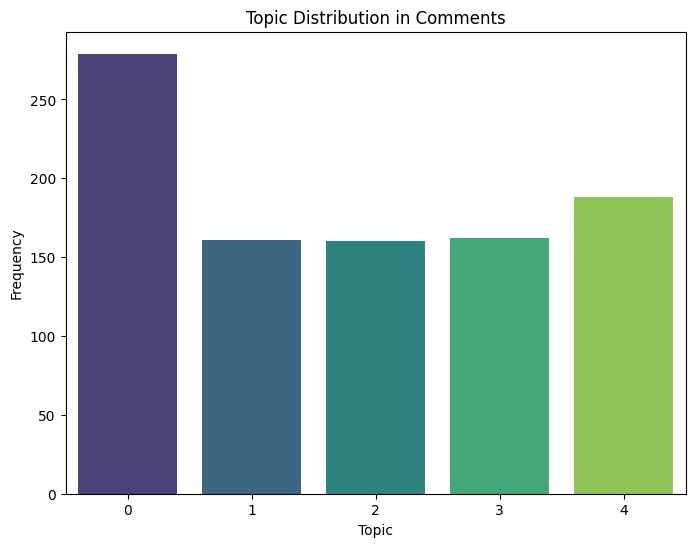

In [2]:
# Visualize topic distribution
topic_counts = df['topic'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.title('Topic Distribution in Comments')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()



Topic #1 Word Cloud:


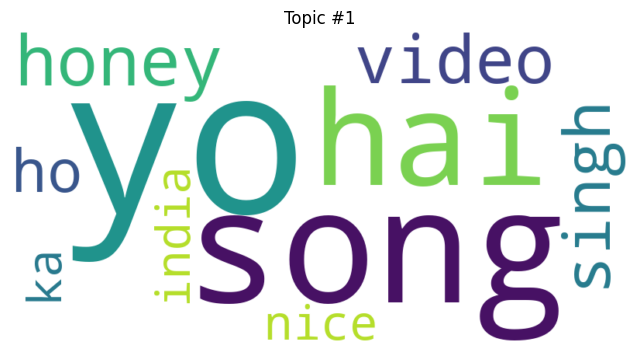


Topic #2 Word Cloud:


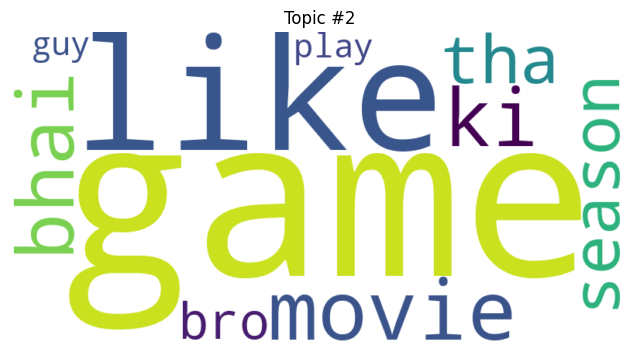


Topic #3 Word Cloud:


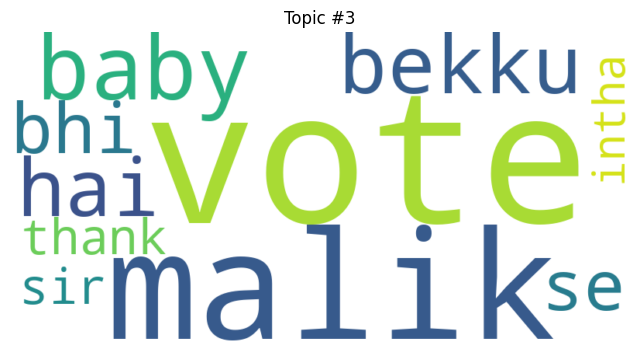


Topic #4 Word Cloud:


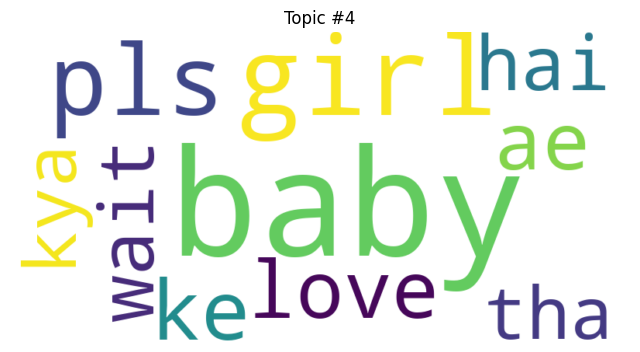


Topic #5 Word Cloud:


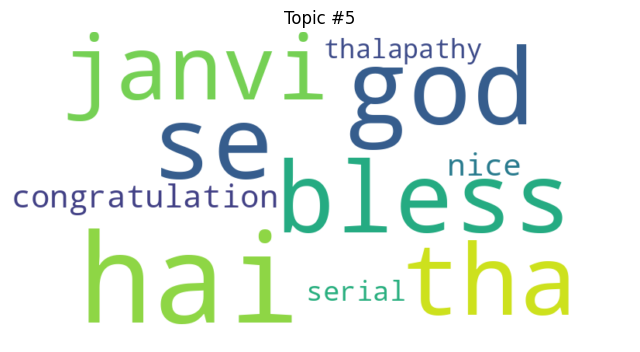

In [3]:
from wordcloud import WordCloud

# Generate a word cloud for each topic
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{topic_idx + 1} Word Cloud:")
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
        {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-10:]})
    
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic #{topic_idx + 1}")
    plt.axis('off')
    plt.show()
